# Análise exploratória de preços de veículos novos e usados


Analisamos a tabela [fipe](http://veiculos.fipe.org.br/) de preço médio de veículos.

In [1]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
import numpy
import pandas
import seaborn

from matplotlib import pyplot
%matplotlib inline

from scipy import stats

pyplot.style.use(['ggplot', 'seaborn-colorblind', 'seaborn-talk'])
pyplot.xkcd()

Carrega os dados da tabela de preços mais recente. Separa modelos e versões de modelos.

In [2]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
prices = pandas.read_csv('../dat/fipe_price_list_201710.csv.gz', index_col=[0])

# Major maker
major_makers = ['Mercedes-Benz', 'BMW', 'Audi', 'VW - Volkswagen', 'Fiat', 
                'GM - Chevrolet', 'Kia Motors', 'Hyundai', 'Ford', 'Citroën', 
                'Renault']
prices['maker_name_major'] = prices['maker_name'].map(lambda x: x 
                                                      if x in major_makers else
                                                      '_outros_')

# Model and version
model_version = prices.model_name.str.split(' ', 1)
prices['model_name'] = model_version.str[0]
prices['model_version'] = model_version.str[1]

In [3]:
prices.head()

date maker_name model_name  fuel_type  build_year    price fipe_code  \
0  2017-10-15      Acura    Integra          1        1992  12614.0  038003-2   
1  2017-10-15      Acura    Integra          1        1991  11601.0  038003-2   
2  2017-10-15      Acura     Legend          1        1998  28761.0  038002-4   
3  2017-10-15      Acura     Legend          1        1997  24217.0  038002-4   
4  2017-10-15      Acura     Legend          1        1996  23302.0  038002-4   

  maker_name_major model_version  
0         _outros_        GS 1.8  
1         _outros_        GS 1.8  
2         _outros_       3.2/3.5  
3         _outros_       3.2/3.5  
4         _outros_       3.2/3.5

In [4]:
prices.describe()

fuel_type    build_year         price
count  22934.000000  22934.000000  2.293400e+04
mean       1.336444   3442.571379  7.574337e+04
std        0.735149   6406.947379  2.016749e+05
min        1.000000   1985.000000  1.902000e+03
25%        1.000000   1999.000000  1.590050e+04
50%        1.000000   2007.000000  3.120300e+04
75%        1.000000   2013.000000  6.511175e+04
max        3.000000  32000.000000  5.500000e+06

## Modelos por marca

In [5]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
prices_by_models = prices.groupby(['maker_name', 'model_name'])\
    ['price'].agg(['min', 'mean', 'max', 'std'])
prices_by_models.reset_index(level=1, inplace=True)
prices_by_models.head()

model_name        min          mean        max            std
maker_name                                                                
AM Gen           Hummer   170643.0  2.219286e+05   290263.0   34972.729108
ASTON MARTIN        DB9   554915.0  1.009014e+06  1436232.0  441272.962986
ASTON MARTIN     Rapide   643655.0  1.210589e+06  1840884.0  500723.204692
ASTON MARTIN   Vanquish  1542242.0  2.086130e+06  2688743.0  575502.046016
ASTON MARTIN    Vantage   316137.0  7.688905e+05  1712739.0  425884.471066

In [6]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
models_by_maker = prices_by_models.pivot_table(index=['maker_name'], 
                                               values='model_name', 
                                               aggfunc='count')
models_by_maker.sort_values(by='model_name', ascending=False, inplace=True)
models_by_maker.head()

model_name
maker_name                
Mercedes-Benz          121
BMW                    100
GM - Chevrolet          58
Ford                    38
Fiat                    35

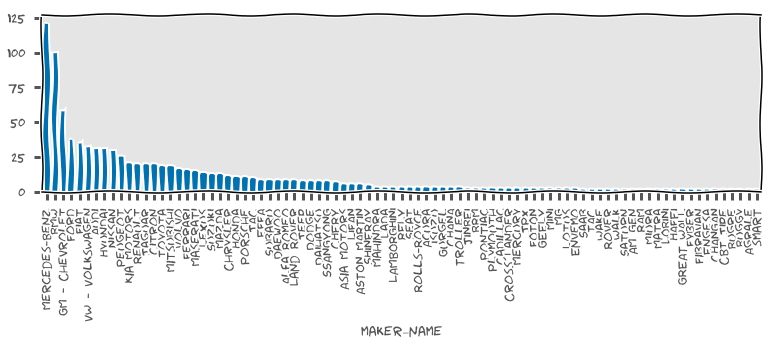

In [7]:
ax = models_by_maker.plot.bar(legend=False, figsize=[11, 5])
ax.figure.tight_layout()

In [8]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
prices_by_models = prices.groupby(['maker_name', 'model_name', 'build_year'])\
    ['price'].agg(['min', 'mean', 'max', 'std'])
prices_by_models.reset_index(level=[2, 1], inplace=True)
prices_by_models.head()

model_name  build_year        min          mean        max  \
maker_name                                                                
AM Gen           Hummer        1998   170643.0  1.926247e+05   209401.0   
AM Gen           Hummer        1999   199707.0  2.143920e+05   234803.0   
AM Gen           Hummer        2000   239710.0  2.587690e+05   290263.0   
ASTON MARTIN        DB9        2011   554915.0  5.549150e+05   554915.0   
ASTON MARTIN        DB9        2014  1035894.0  1.035894e+06  1035894.0   

                       std  
maker_name                  
AM Gen        19896.413303  
AM Gen        18235.202521  
AM Gen        27474.958981  
ASTON MARTIN           NaN  
ASTON MARTIN           NaN

In [9]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
models_by_maker = prices_by_models.pivot_table(index=['maker_name'], 
                                               values='model_name',
                                               columns=['build_year'],
                                               aggfunc='count')
models_by_maker.head()

build_year    1985   1986   1987   1988   1989   1990   1991   1992   1993   \
maker_name                                                                    
AM Gen          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ASTON MARTIN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Acura           NaN    NaN    NaN    NaN    NaN    NaN    3.0    3.0    2.0   
Agrale          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Alfa Romeo      1.0    1.0    NaN    NaN    NaN    NaN    2.0    2.0    2.0   

build_year    1994   ...    2010   2011   2012   2013   2014   2015   2016   \
maker_name           ...                                                      
AM Gen          NaN  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ASTON MARTIN    NaN  ...      NaN    3.0    3.0    NaN    4.0    1.0    4.0   
Acura           2.0  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Agrale          NaN  ...      1.0    1.0    1.0    1.0    1.0    1.0    1.0   
Alfa Romeo      1.0  ...      NaN    NaN    NaN    NaN    NaN    NaN    NaN   

build_year    2017   2018   32000  
maker_name                         
AM Gen          NaN    NaN    NaN  
ASTON MARTIN    NaN    NaN    3.0  
Acura           NaN    NaN    NaN  
Agrale          1.0    NaN    1.0  
Alfa Romeo      NaN    NaN    NaN  

[5 rows x 35 columns]

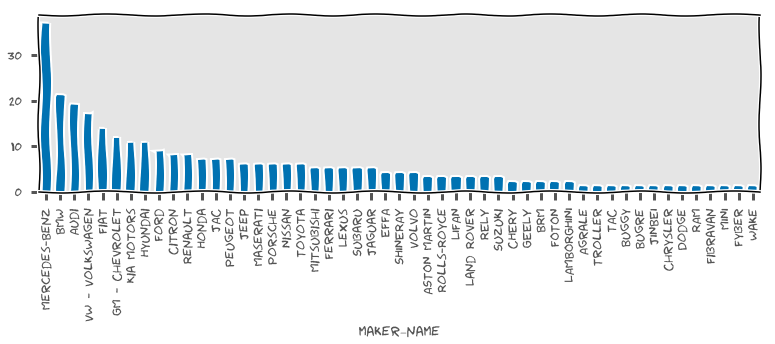

In [10]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
models_by_maker_today = models_by_maker[32000].sort_values(ascending=False)
ax = models_by_maker_today[models_by_maker_today>0].plot.bar(legend=False,
                                                             figsize=[11, 5])
ax.figure.tight_layout()

In [11]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
prices_by_models_major = prices.groupby(['maker_name_major', 'model_name', 
                                         'build_year'])['price'].agg(['min', 'mean',
                                                                      'max', 'std'])
prices_by_models_major.reset_index(level=2, inplace=True)
prices_by_models_major.head()

build_year      min          mean      max  \
maker_name_major model_name                                               
Audi             100               1993  11553.0  11553.000000  11553.0   
                 100               1994  12118.0  14047.666667  16692.0   
                 100               1995  14134.0  16509.666667  18801.0   
                 80                1994  11082.0  17395.833333  33813.0   
                 80                1995  13895.0  19689.000000  38381.0   

                                     std  
maker_name_major model_name               
Audi             100                 NaN  
                 100         2369.267890  
                 100         2334.642656  
                 80          8336.167883  
                 80          9359.300893

In [12]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
models_by_maker_major = prices_by_models_major\
    [prices_by_models_major.build_year < 32000].pivot_table(
        index='build_year', columns=['maker_name_major'],  values='mean',
        aggfunc='count')
models_by_maker_major.head()

maker_name_major  Audi  BMW  Citroën  Fiat  Ford  GM - Chevrolet  Hyundai  \
build_year                                                                  
1985               NaN  NaN      NaN   6.0   8.0            13.0      NaN   
1986               NaN  2.0      NaN   6.0   9.0            13.0      NaN   
1987               NaN  3.0      NaN   5.0   6.0            13.0      NaN   
1988               NaN  2.0      NaN   5.0   6.0            14.0      NaN   
1989               NaN  3.0      NaN   4.0   6.0            16.0      NaN   

maker_name_major  Kia Motors  Mercedes-Benz  Renault  _outros_  
build_year                                                      
1985                     NaN            2.0      NaN      17.0  
1986                     NaN            5.0      NaN      17.0  
1987                     NaN            4.0      NaN      15.0  
1988                     NaN            5.0      NaN      17.0  
1989                     NaN            4.0      NaN      16.0

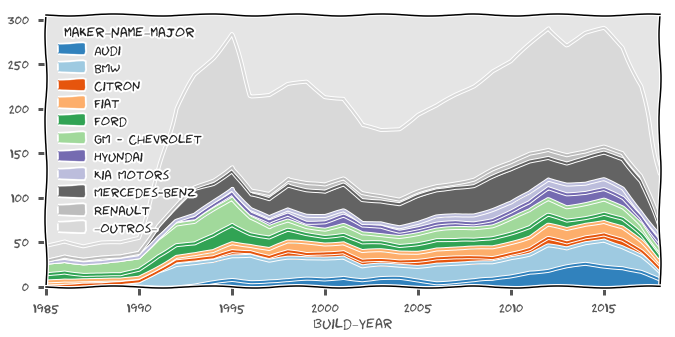

In [13]:
colors = pyplot.cm.tab20c(numpy.linspace(0, 1, 11))
models_by_maker_major.plot.area(figsize=[11, 5], color=colors)

## Versões por marca

Desde 1985:

In [14]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
ptable_versions = prices.pivot_table(index=['maker_name'], values='model_name', 
                                     aggfunc=len)
ptable_versions.sort_values(by='model_name', ascending=False, inplace=True)

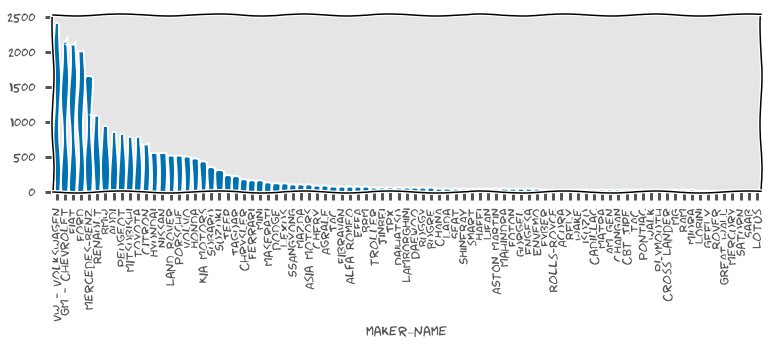

In [15]:
ax = ptable_versions.plot.bar(legend=False, figsize=[11, 5])
ax.figure.tight_layout()

Hoje, considerando-se apenas carros novos (0 km):

In [16]:
ptable_versions_new = prices[prices.build_year==32000].pivot_table(
    index=['maker_name'], values='model_name', aggfunc=len)
ptable_versions_new.sort_values(by='model_name', ascending=False, inplace=True)

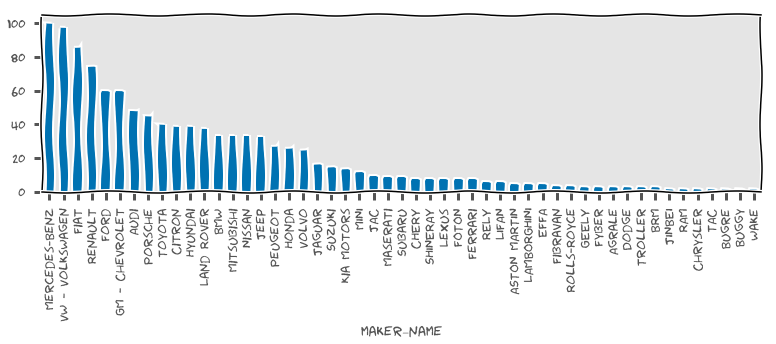

In [17]:
ax = ptable_versions_new.plot.bar(legend=False, figsize=[11, 5])
ax.figure.tight_layout()

Ao longo do tempo, quantas versões de carros há no mercado?

In [18]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
ptable_model_version = prices.pivot_table(index=['maker_name', 'model_name'],
                                          columns='build_year',
                                          values='model_version', aggfunc=len)

In [19]:
ptable_model_version.head()

build_year               1985   1986   1987   1988   1989   1990   1991   \
maker_name   model_name                                                    
AM Gen       Hummer        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
ASTON MARTIN DB9           NaN    NaN    NaN    NaN    NaN    NaN    NaN   
             Rapide        NaN    NaN    NaN    NaN    NaN    NaN    NaN   
             Vanquish      NaN    NaN    NaN    NaN    NaN    NaN    NaN   
             Vantage       NaN    NaN    NaN    NaN    NaN    NaN    NaN   

build_year               1992   1993   1994   ...    2010   2011   2012   \
maker_name   model_name                       ...                          
AM Gen       Hummer        NaN    NaN    NaN  ...      NaN    NaN    NaN   
ASTON MARTIN DB9           NaN    NaN    NaN  ...      NaN    1.0    NaN   
             Rapide        NaN    NaN    NaN  ...      NaN    1.0    1.0   
             Vanquish      NaN    NaN    NaN  ...      NaN    NaN    NaN   
             Vantage       NaN    NaN    NaN  ...      NaN    2.0    3.0   

build_year               2013   2014   2015   2016   2017   2018   32000  
maker_name   model_name                                                   
AM Gen       Hummer        NaN    NaN    NaN    NaN    NaN    NaN    NaN  
ASTON MARTIN DB9           NaN    1.0    NaN    1.0    NaN    NaN    NaN  
             Rapide        NaN    1.0    NaN    1.0    NaN    NaN    1.0  
             Vanquish      NaN    1.0    NaN    1.0    NaN    NaN    1.0  
             Vantage       NaN    1.0    1.0    2.0    NaN    NaN    2.0  

[5 rows x 35 columns]

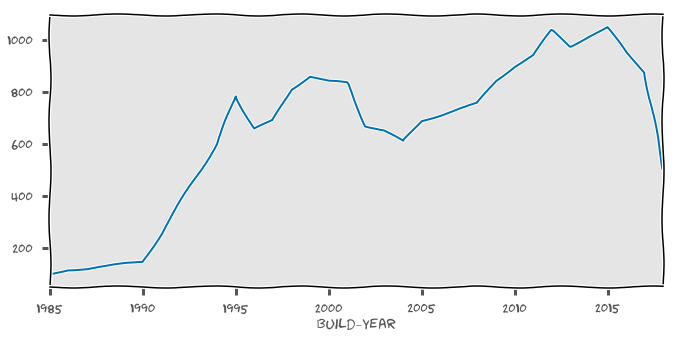

In [20]:
version_timeseries = ptable_model_version.sum()
version_timeseries[version_timeseries.index < 32000].plot.line(figsize=[11, 5])

## Distribuição de preços

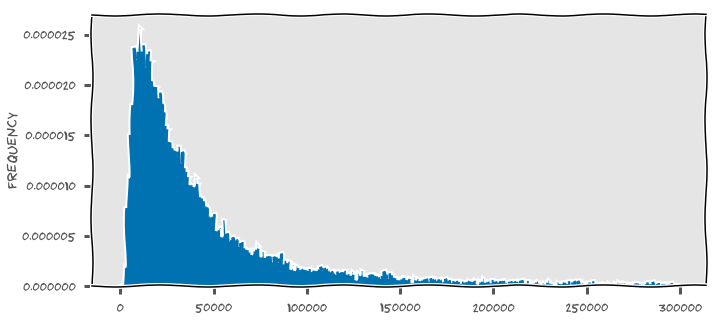

In [21]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
bins = numpy.arange(0, 300e3, 1e3)
ax = prices['price'].plot.hist(bins=bins, legend=False, figsize=[11, 5],
                               linewidth=0, normed=True, histtype='stepfilled')

### Inverse gaussian distribution

https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution

\begin{equation}
    f(x\;|\;\mu, \lambda) = \sqrt{\frac{\lambda}{2\pi x^3}} e^{-\frac{\lambda(x - \mu)^2}{2 \mu^2 x}}
\end{equation}

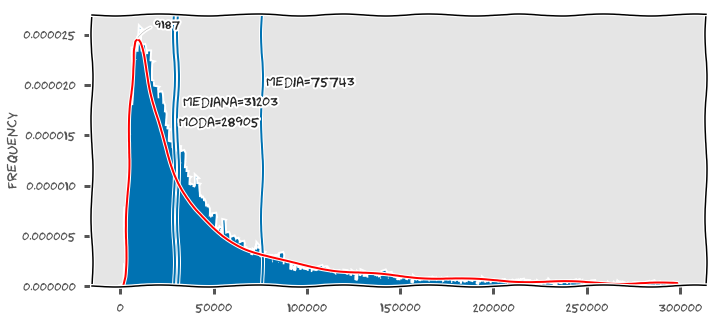

In [22]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|

ax = prices['price'].plot.hist(bins=bins, legend=False, figsize=[11, 5],
                               linewidth=0, normed=True, histtype='stepfilled')

mean, median = prices.price.mean(), prices.price.median()
mode = prices.price.mode().values[0]
ax.axvline(mean)
ax.text(mean+2500, 2e-5, 'Media={:.0f}'.format(mean))
ax.axvline(median)
ax.text(median+2500, 1.8e-5, 'Mediana={:.0f}'.format(median))
ax.axvline(mode)
ax.text(mode+2500, 1.6e-5, 'Moda={:.0f}'.format(mode))

mu, loc, scale = stats.invgauss.fit(prices['price'])
x = 0.5 * (bins[1:] + bins[:-1])  # Center of the bins
pdf = stats.invgauss.pdf(x, mu, loc, scale)
ax.plot(x, pdf, 'r')
ax.annotate('{:.0f}'.format(scale/mu), xy=(scale/mu, 2.45e-5), xycoords='data',
                xytext=(30, 10), textcoords='offset points',
                fontsize='12', fontstretch='ultra-condensed',
                ha='center', va='bottom',
                arrowprops=dict(arrowstyle="-",
                                connectionstyle='arc3,rad=0.3',
                                color='#999999')
           )

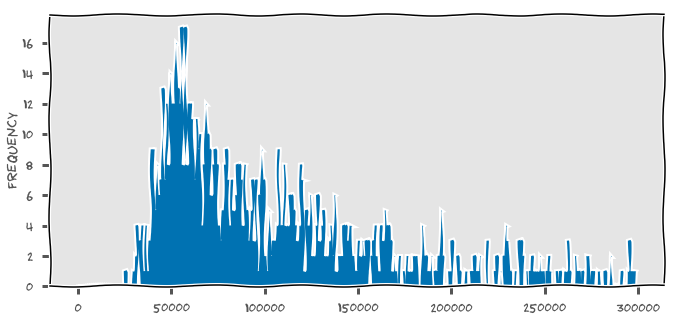

In [23]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
ax = prices['price'][prices.build_year == 32000].plot.hist(
    bins=bins, legend=False, figsize=[11, 5], linewidth=0,
    histtype='stepfilled')

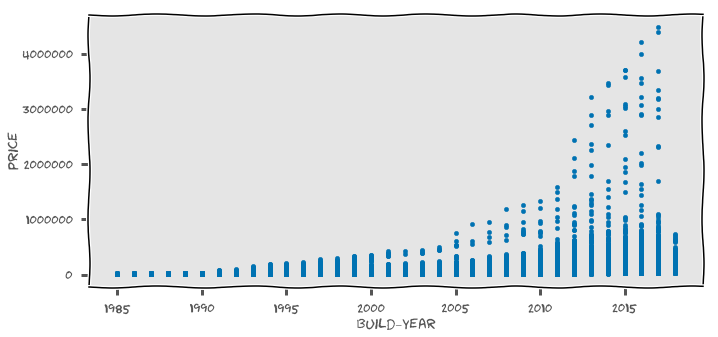

In [24]:
prices.where(prices.build_year < 32000)\
    .plot.scatter('build_year', 'price', figsize=[11, 5])

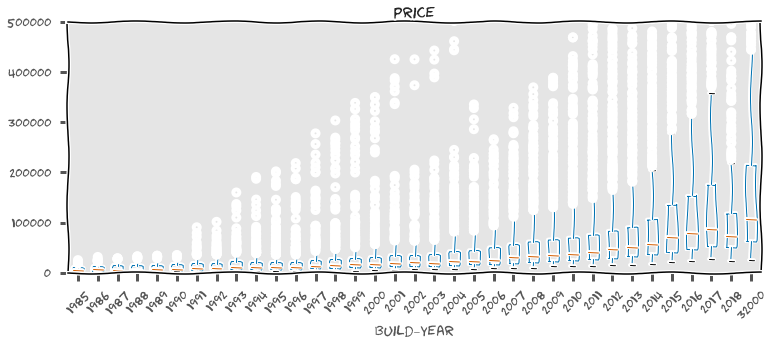

In [25]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
ax = prices.boxplot(column='price', by='build_year', rot=45, figsize=[11, 5],
                    grid=False)
ax.set_ylim([0, 5e5])
ax.figure.suptitle('')
ax.figure.tight_layout()

In [26]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
ptable = prices.pivot_table(values='price', index=['maker_name', 'model_name',
                                                   'fuel_type'], 
                            columns=['build_year'])
ptable.describe()

build_year         1985          1986          1987          1988   \
count          50.000000     58.000000     52.000000     55.000000   
mean         7497.733667   9676.396839  10989.528663  12069.736061   
std          5896.329065   7216.644593   7904.445955   8410.434603   
min          1905.000000   1970.000000   2801.000000   3197.000000   
25%          3460.000000   4145.400000   4546.083333   5044.750000   
50%          4357.000000   7887.100000   9178.000000   9966.500000   
75%          9221.125000  13045.000000  14877.250000  17493.500000   
max         22521.000000  31320.000000  28940.000000  30620.000000   

build_year         1989          1990          1991          1992   \
count          57.000000     62.000000    134.000000    210.000000   
mean        12729.083500  13675.162750  16966.596899  17412.521735   
std          8767.920232   8926.772187  13480.079525  14071.641928   
min          3306.000000   3422.000000   2086.666667   2226.666667   
25%          5238.833333   6216.833333   7682.250000   7904.250000   
50%         11457.000000  11992.000000  13141.250000  13406.000000   
75%         16595.000000  18687.000000  22292.500000  21736.375000   
max         31686.000000  33134.000000  81070.000000  92733.000000   

build_year          1993           1994       ...              2010   \
count          252.000000     275.000000      ...       2.710000e+02   
mean         20292.588336   21412.604360      ...       1.103455e+05   
std          18390.710642   20690.058114      ...       1.600777e+05   
min           2467.500000    3211.000000      ...       1.349600e+04   
25%           8519.000000    8790.000000      ...       2.817871e+04   
50%          14794.500000   14625.500000      ...       5.383000e+04   
75%          25114.000000   25888.000000      ...       1.252220e+05   
max         142937.000000  174662.666667      ...       1.331256e+06   

build_year         2011          2012          2013          2014   \
count       2.880000e+02  3.050000e+02  2.880000e+02  2.980000e+02   
mean        1.278424e+05  1.420926e+05  1.718912e+05  2.021250e+05   
std         2.035426e+05  2.693251e+05  3.569604e+05  3.922134e+05   
min         1.401300e+04  1.504500e+04  1.618200e+04  1.784200e+04   
25%         3.035510e+04  3.288100e+04  3.745193e+04  4.382831e+04   
50%         5.670242e+04  6.280467e+04  7.292450e+04  8.414225e+04   
75%         1.342025e+05  1.367405e+05  1.513331e+05  1.975008e+05   
max         1.588451e+06  2.432665e+06  2.958192e+06  3.442318e+06   

build_year         2015          2016          2017           2018   \
count       3.070000e+02  2.880000e+02  2.460000e+02     137.000000   
mean        2.537787e+05  2.951061e+05  2.934637e+05  134400.539443   
std         5.022644e+05  5.559524e+05  5.297189e+05  116199.193452   
min         2.204267e+04  2.543550e+04  2.760500e+04   26575.666667   
25%         5.582062e+04  6.157688e+04  6.998806e+04   54559.142857   
50%         1.106752e+05  1.270136e+05  1.379740e+05   92715.500000   
75%         2.335923e+05  2.801575e+05  3.051585e+05  163561.000000   
max         3.714500e+06  3.990949e+06  4.034623e+06  625671.333333   

build_year         32000  
count       3.140000e+02  
mean        3.625156e+05  
std         6.845434e+05  
min         2.938567e+04  
25%         7.402405e+04  
50%         1.477769e+05  
75%         3.412118e+05  
max         4.892973e+06  

[8 rows x 35 columns]

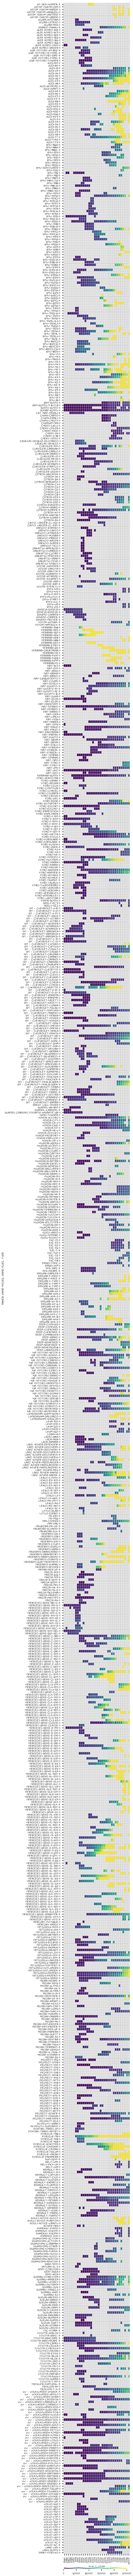

In [27]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
fig = pyplot.figure(figsize=[9, 200])
ax = seaborn.heatmap(ptable, square=False, cmap='viridis', linewidths=0.1,
                     linecolor='#cccccc', vmin=0, vmax=200e3, 
                     cbar_kws=dict(orientation='horizontal', extend='max',
                                   pad=0.0045, aspect=40))
fig.tight_layout()

## Desvalorização ao deixar a concessionária

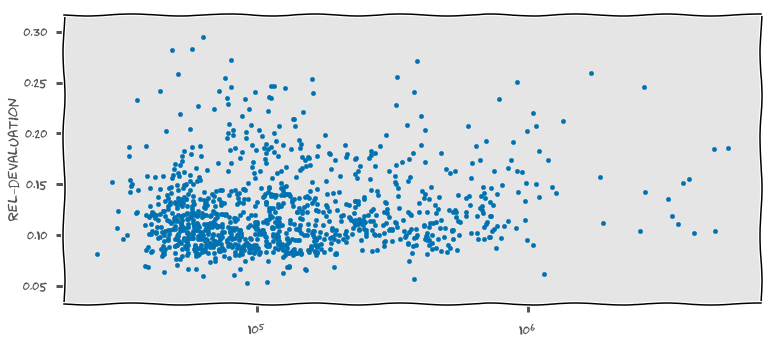

In [28]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
def get_almost_new(df):
    if not pandas.isnull(df[2018]):
        return df[2018]
    elif not pandas.isnull(df[2017]):
        return df[2017]
    elif not pandas.isnull(df[2016]):
        return df[2016]
    else:
        return numpy.nan


prices_ptable = prices.where(prices.build_year >= 2016)\
    .pivot_table(values='price', columns=['build_year'], 
                 index=['maker_name', 'model_name', 'fipe_code'], aggfunc=sum)
prices_ptable['almostnew'] = [get_almost_new(prices_ptable.iloc[n]) for n 
                                  in range(len(prices_ptable))]
prices_ptable['rel_devaluation'] = 1 - (prices_ptable['almostnew'] / 
                                    prices_ptable[32000])

ax = prices_ptable.plot.scatter([32000], 'rel_devaluation', logx=True,
                                figsize=[11, 5], by='maker_name')
ax.set_xlabel('')
ax.figure.tight_layout()

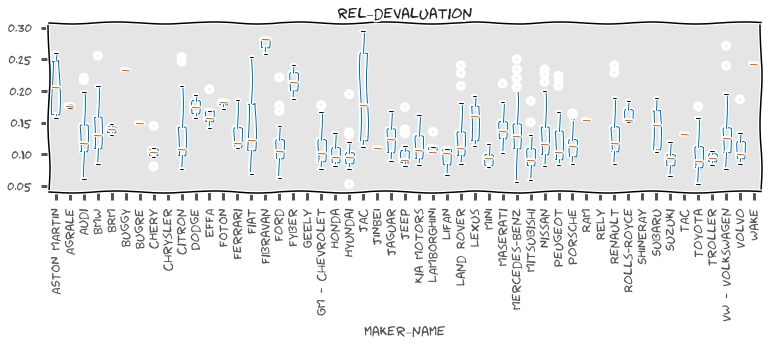

In [29]:
#...:....|....:....|....:....|....:....|....:....|....:....|....:....|....:....|
ax = prices_ptable.boxplot(column='rel_devaluation', by='maker_name', rot=90, 
                           grid=False, figsize=[11, 5])
ax.figure.suptitle('')
ax.figure.tight_layout()